In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../data/coffee_quality/merged_data_cleaned.csv", index_col=0)

In [4]:
df.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [5]:

df.rename(columns={"Country.of.Origin": "Country of Origin", 
                   "Farm.Name": "Farm Name", 
                   "ICO.Number": "ICO Number", 
                   "Processing.Method": "Processing Method",
                   "Number.of.Bags": "Number of Bags",
                   "Bag.Weight": "Bag Weight",
                   "Harvest.Year": "Harvest Year",
                   "Owner.1": "Owner",
                   "Clean.Cup": "Clean Cup",
                   "Category.One.Defects": "Category One Defects",
                   "Cupper.Points": "Cupper Points",
                   "Total.Cup.Points": "Total Cup Points"}, inplace=True)


[Text(0.5, 0, 'Farm Name'), Text(0, 0.5, 'Number of Coffee Beans')]

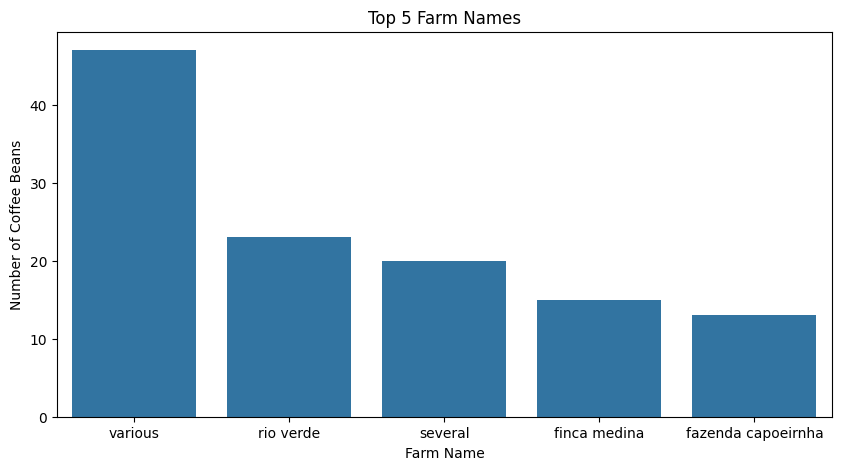

In [6]:
farms = df[["Farm Name"]].value_counts()
fig, ax = plt.subplots(figsize=(10, 5))

farms_graph = sns.barplot(x=farms.index.get_level_values(0)[:5], y=farms[:5], ax=ax)
farms_graph.set_title("Top 5 Farm Names")
farms_graph.set(xlabel="Farm Name", ylabel="Number of Coffee Beans")


In [7]:
# Treat the weights

# df[["Bag Weight"]] = df[["Bag Weight"]].applymap(lambda x: x.replace(" lbs", "") if " lbs" in x else x.replace(" kg", ""))
# df[["Bag Weight"]] = df[["Bag Weight"]].astype(float)
df[["Bag Weight"]]

,Bag Weight
0,60 kg
1,60 kg
2,1
3,60 kg
4,60 kg
...,...
1334,2 kg
1335,2 kg
1336,1 kg
1337,5 lbs


In [8]:
df["Total Beens Mass"] = df["Bag Weight"] * df["Number of Bags"]

df[["Bag Weight","Number of Bags"]].value_counts()

Bag Weight  Number of Bags
70 kg       250               82
1 kg        250               76
69 kg       275               73
            250               56
60 kg       320               53
                              ..
10 kg       10                 1
50 kg       60                 1
            175                1
55 lbs      36                 1
0 kg        275                1
Name: count, Length: 339, dtype: int64

In [9]:
df = df[["altitude_mean_meters",'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Sweetness', "Country of Origin", "Total Cup Points"]].dropna()
X = pd.get_dummies(df[["altitude_mean_meters",'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Sweetness', "Country of Origin"]])

y = df[["Total Cup Points"]]
len(y)

1109

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, df[['Total Cup Points']], train_size=0.8, random_state=42)
x_train.shape
lr = LinearRegression().fit(x_train, y_train)

In [11]:
score = lr.score(x_test, y_test)
score

0.9213411554055476

In [12]:
y_predict = lr.predict(x_test)

Text(0, 0.5, 'Coffee Points')

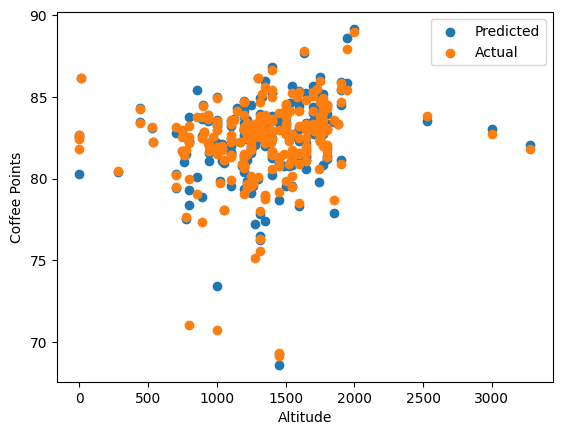

In [13]:
plt.scatter(x_test[['altitude_mean_meters']], y_predict)
plt.scatter(x_test[['altitude_mean_meters']], y_test)
plt.legend(["Predicted", "Actual"])
plt.xlabel("Altitude")
plt.ylabel("Coffee Points")

In [14]:
notas = {
    "altitude_mean_meters": 1000,
    "Aroma": 8.5,
    "Flavor": 8.42,
    "Aftertaste": 8.42,
    "Acidity": 8.42,
    "Body": 8.33,
    "Balance": 8.42,
    "Uniformity": 8.42,
    "Sweetness": 8.42,
    "Country of Origin": "Colombia"
}

# Convert the dictionary to a DataFrame
new_data = pd.DataFrame([notas])

# Convert categorical variables to dummy variables
new_data_dummies = pd.get_dummies(new_data)

# Align new data with training data columns
new_data_dummies = new_data_dummies.reindex(columns=x_train.columns, fill_value=0)

# Display the result
new_data_dummies.head()


,altitude_mean_meters,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Country of Origin_Brazil,...,Country of Origin_Rwanda,Country of Origin_Taiwan,"Country of Origin_Tanzania, United Republic Of",Country of Origin_Thailand,Country of Origin_Uganda,Country of Origin_United States,Country of Origin_United States (Hawaii),Country of Origin_United States (Puerto Rico),Country of Origin_Vietnam,Country of Origin_Zambia
0,1000,8.5,8.42,8.42,8.42,8.33,8.42,8.42,8.42,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
prediction = lr.predict(new_data_dummies)[0]
rounded_prediction = round(float(prediction), 2)
print(f'Coffee Grade: {rounded_prediction}')

Coffee Grade: 85.0


In [16]:
country_to_float = {country: float(idx) for idx, country in enumerate(df['Country of Origin'].unique())}

# Map the 'Country' column to floats
df['Country_Float'] = df['Country of Origin'].map(country_to_float)

df[["Country of Origin", "Country_Float"]]

,Country of Origin,Country_Float
0,Ethiopia,0.0
1,Ethiopia,0.0
2,Guatemala,1.0
3,Ethiopia,0.0
4,Ethiopia,0.0
...,...,...
1331,India,35.0
1332,India,35.0
1333,United States,2.0
1335,Ecuador,21.0


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Reshape and normalize the 'Country_Float' column
df['Country_Normalized'] = scaler.fit_transform(df[['Country_Float']])

df[["Country of Origin", "Country_Float", "Country_Normalized"]].head()

,Country of Origin,Country_Float,Country_Normalized
0,Ethiopia,0.0,0.000000
1,Ethiopia,0.0,0.000000
2,Guatemala,1.0,0.028571
3,Ethiopia,0.0,0.000000
4,Ethiopia,0.0,0.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

encoder = OrdinalEncoder()

# Encode the 'Country' column to integers
df['Country_Ordinal'] = encoder.fit_transform(df[['Country of Origin']])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Country_Ordinal' column
df['Country_Normalized'] = scaler.fit_transform(df[['Country_Ordinal']])
df[["Country of Origin", "Country_Ordinal", "Country_Normalized"]].head()



,Country of Origin,Country_Ordinal,Country_Normalized
0,Ethiopia,8.0,0.228571
1,Ethiopia,8.0,0.228571
2,Guatemala,9.0,0.257143
3,Ethiopia,8.0,0.228571
4,Ethiopia,8.0,0.228571


In [19]:
def coffee_points(altitude, aroma, flavor, aftertaste, acidity, body, balance, uniformity, sweetness, country):
    X = df[[
        "altitude_mean_meters", 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 
        'Body', 'Balance', 'Uniformity', 'Sweetness', "Country of Origin"
    ]].copy()
    y = df[["Total Cup Points"]].copy()
    
    encoder = OrdinalEncoder()
    scaler = MinMaxScaler()

    # Encode and normalize the 'Country of Origin'
    X['Country_Ordinal'] = encoder.fit_transform(X[['Country of Origin']])
    X['Country_Normalized'] = scaler.fit_transform(X[['Country_Ordinal']])
    X = X.drop(columns=['Country of Origin', 'Country_Ordinal'])
    
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    
    # Fit the model
    lr = LinearRegression().fit(x_train, y_train)
    
    # Prepare new data for prediction
    infos = {
        "altitude_mean_meters": altitude,
        "Aroma": aroma,
        "Flavor": flavor,
        "Aftertaste": aftertaste,
        "Acidity": acidity,
        "Body": body,
        "Balance": balance,
        "Uniformity": uniformity,
        "Sweetness": sweetness,
        "Country of Origin": country
    }
    
    new_data = pd.DataFrame([infos])
    new_data['Country_Ordinal'] = encoder.transform(new_data[['Country of Origin']])
    new_data['Country_Normalized'] = scaler.transform(new_data[['Country_Ordinal']])
    new_data = new_data.drop(columns=['Country of Origin', 'Country_Ordinal'])
    # Predict the Total Cup Pointsxz
    prediction = lr.predict(new_data)
    
    return {"Total Cup Points": float(prediction[0]), "Score": lr.score(x_test, y_test), "Model" : lr}



In [29]:
coffee_points(1000, 10, 10, 9, 1, 3, 4, 1, 3, "Peru")["Total Cup Points"]

58.90739195747056

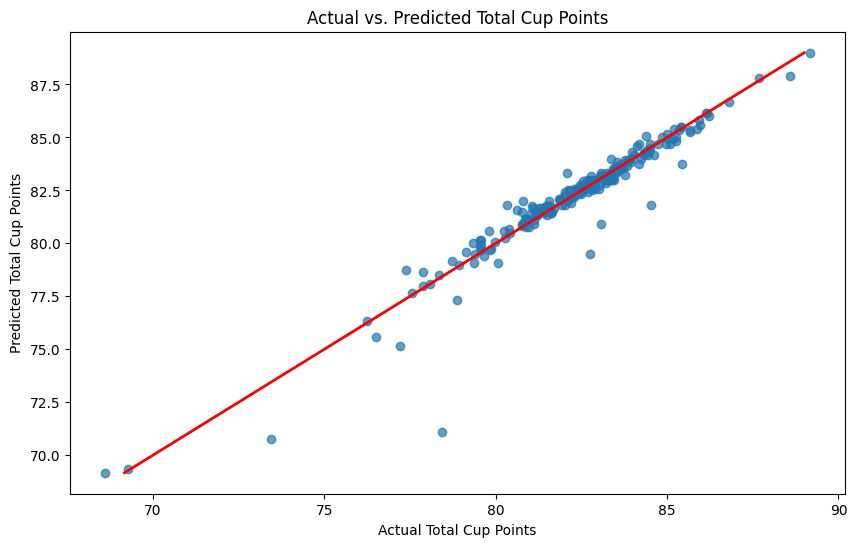

In [21]:
def plot_regression(lr, x_test, y_test):
    # Predict on the test set
    y_pred = lr.predict(x_test)
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, y_test, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
    plt.xlabel('Actual Total Cup Points')
    plt.ylabel('Predicted Total Cup Points')
    plt.title('Actual vs. Predicted Total Cup Points')
    plt.show()

# After training the model
plot_regression(lr, x_test, y_test)

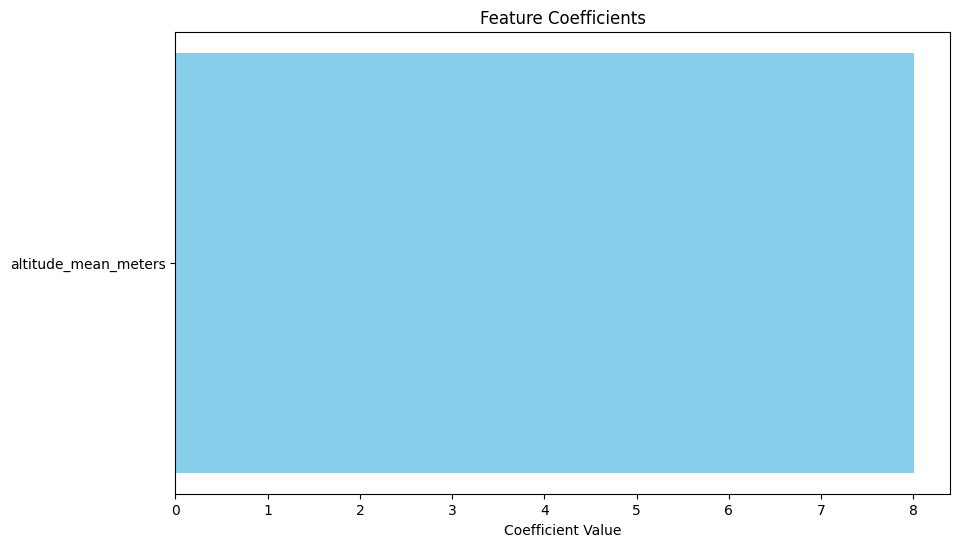

In [27]:
def plot_coefficients(lr, feature_names):
    coefficients = lr.coef_.flatten()  # Get the coefficients
    coef_dict = dict(zip(feature_names, coefficients))
    
    # Sort coefficients for better visualization
    sorted_coef = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))
    
    # Plot the coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(list(sorted_coef.keys()), list(sorted_coef.values()), color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title('Feature Coefficients')
    plt.show()

# After training the model
feature_names = x_train.columns.tolist()
plot_coefficients(lr, feature_names)

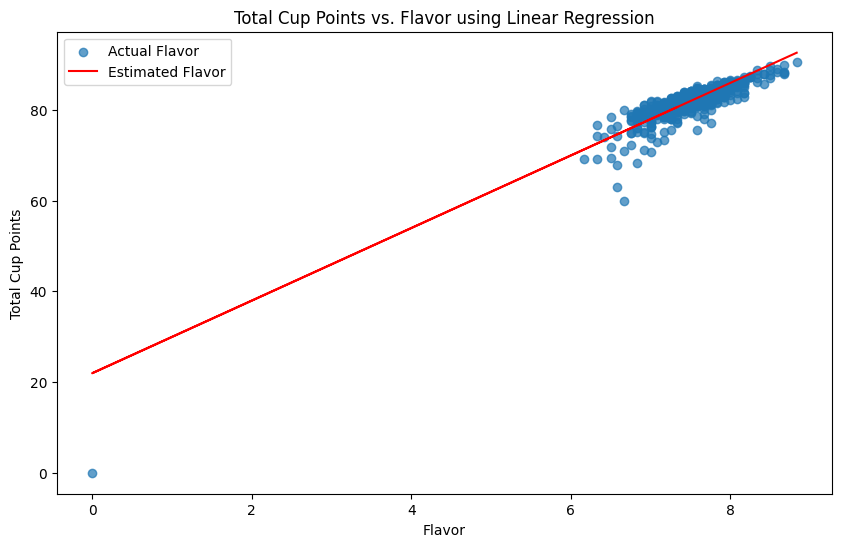

In [23]:

# Prepare data
X = df[['Flavor']].values  # Use altitude as an example feature
y = df['Total Cup Points'].values

# Fit linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Predict flavor values
y_pred = lr.predict(X)

# Plot actual flavor values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Actual Flavor')

# Plot regression line
plt.plot(X, y_pred, color='red', label='Estimated Flavor')

plt.xlabel('Flavor')
plt.ylabel('Total Cup Points')
plt.title('Total Cup Points vs. Flavor using Linear Regression')
plt.legend()
plt.show()




In [24]:
lr.predict(pd.DataFrame([{'altitude_mean_meters': 10}]))

/Users/luneto10/.local/share/virtualenvs/HarvardX-fdAnR-vF/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([101.94890144])